# <span style="color:red"> Numerical Simulation 02 </span>

## Exercise 02.1

We want to compute the following 1D integral via Monte Carlo using two different methods
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. Uniform sampling in the interval $[0,1]$
2. Importance sampling: in this method you have to sample a non-uniform probability distribution, in $[0,1]$. I've chosen to use the normalized Taylor-expansion of the integrand in $1$, as my pdf (probability distribution function), because it was the easiest pdf that was both similiar to the function (in the selected range), and both has an easily invertible cumulative function. Indeed I've used the method of the inversion of the cumulative function to generate numbers along the pdf: $p(x)=-2(x-1)$ that was sampled through $$x=1-\sqrt{(1-y)}$$ were $y$ is sampled in a uniform distribution in $[0,1]$.

For each one of  these methods I've divided $M=10^5$ steps in $N=100$ blocks, I've made an estimation of the integral in each block (with $M/N$ steps) and used the blocking method to calculate progressive errors, which I've plotted along with progresive mean. In the two plots it's clearly visible the convergence of the integrals to $0$, and that's because i've plotted $I-1$.

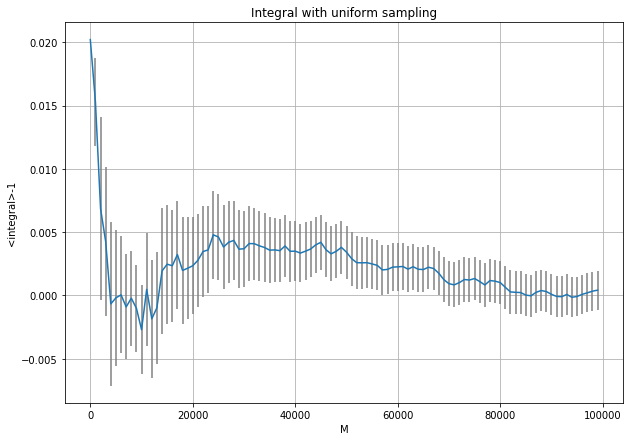

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(100)
x*=1000
integral, err =np.loadtxt("integral.dat",unpack=True)
fig=plt.figure(figsize=(10,7))
plt.errorbar(x, integral-1, yerr=err, ecolor="grey")
plt.xlabel('M')
plt.ylabel('<integral>-1')
plt.title("Integral with uniform sampling")
plt.grid(True)
plt.show()

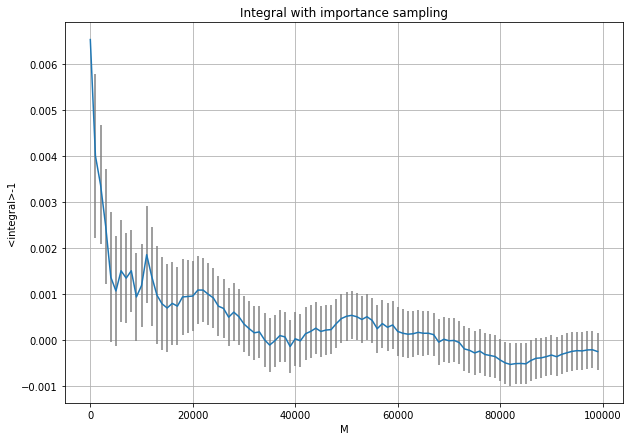

In [31]:
integral, err =np.loadtxt("imp.samp.dat",unpack=True)
fig=plt.figure(figsize=(10,7))
plt.errorbar(x, integral-1, yerr=err, ecolor="grey")
plt.xlabel('M')
plt.ylabel('<integral>-1')
plt.title("Integral with importance sampling")
plt.grid(True)
plt.show()

## Exercise 02.2

The idea of the Random Walk is very easy: we have a walker that for each time instanct make a step in a casual direction. This step can be done in two different ways: a discrete one and a continous one: 

1. **Discrete random walk**. The walker can only moove on a 3D grid, that allows him to go $\pm 1$ in the $3$ directions of space. To simulate this situation I casually generate two variables: the first one in $[-1,1]$, whose sign decide if the walker should go $+1$ or $-1$. The second one was generated in $[0,3)$ and decided in which direction the walker should go: $x$ if it was in $[0,1)$, $y$ if it was in $[1,2)$ and $z$ if it was in $[2,3)$.
  
  
2. **Continous random walk**. In this case the walker can chose any direction in the space to make his step (of leght 1). For this part I had to uniform sample the solid angle, to obtain a value of $\theta$ and $\phi$ to use to calculate the new position in space of the walker, in axial coordinates. I've generated $x$, $y$ and $z$ in a unitary sphere and then calculate $\theta=\arctan{(\frac{x^2+y^2}{z})}$ and $\phi=\arctan{(\frac{y}{x})}$.


For both methods what I've done is to simulate $10^4$ times a random walk of $100$ steps, starting always from the origin, and plot the "position" of the walker at each step as $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$. This value was obtained making, for each $N\in [0,10^2]$, a mean of the $10^4$ values of $|\vec{r}_N|^2$, and then making the square root. In this way the error that I had, as the standard deviation of the mean, was referred to  $\langle|\vec{r}_N|^2\rangle$ and not to $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, so I had to propague it as $\frac{ST.D.}{2*\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} }$. Then I've fitted my results with $f(N)=k\sqrt{N}$, and the "good" resulst of these fits does indicate a diffusive behaviour. With saying "good" I mean that the variances in the fit's paramenters are a lot minor than the parameter itself, that's why I've printed the fit's parameters under the plots.

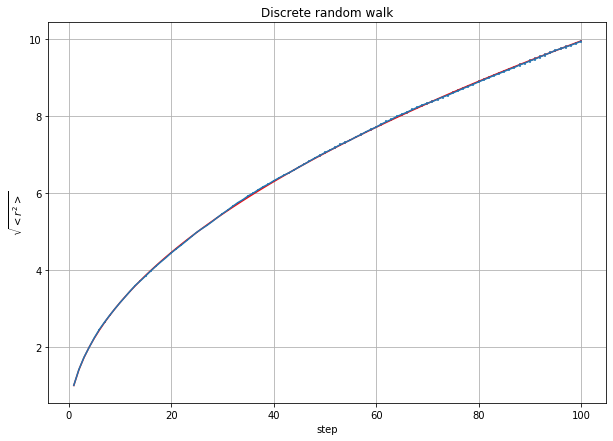

Parametri del fit: 
[0.9955617] [[3.47613878e-08]]


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

x = np.arange(100)
x+=1
r, err =np.loadtxt("DiscreteWalk.dat",unpack=True)

fig=plt.figure(figsize=(10,7))
plt.errorbar(x, r, yerr=err)
plt.xlabel('step')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title("Discrete random walk")
plt.grid(True)

#Fit con f(N)=kradq(N)
def f(x,k):
    return k*np.sqrt(x)
k_opt,k_cov=curve_fit(f,x,r)
my_fit=f(x,k_opt)
plt.plot(x, my_fit, color="red")

plt.show()
print("Parametri del fit: ")
print(k_opt, k_cov)

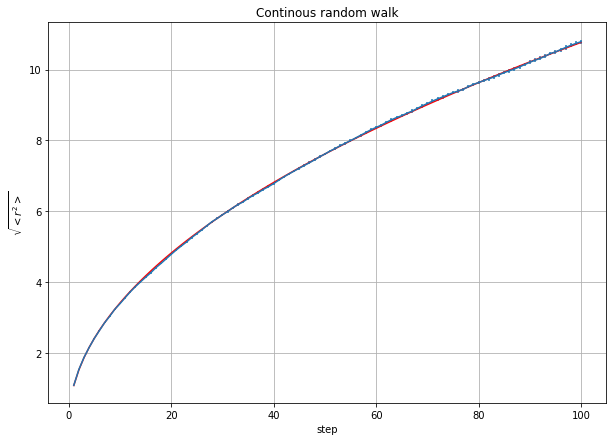

Parametri del fit: 
[1.07666869] [[8.41739587e-08]]


In [3]:
r, err =np.loadtxt("ContinousWalk.dat",unpack=True)
fig=plt.figure(figsize=(10,7))
plt.errorbar(x, r, yerr=err)
plt.xlabel('step')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title("Continous random walk")
plt.grid(True)
#Fit con f(N)=kradq(N)
k_opt,k_cov=curve_fit(f,x,r)
my_fit=f(x,k_opt)
plt.plot(x, my_fit, color="red")

plt.show()
print("Parametri del fit: ")
print(k_opt, k_cov)